# Exploratory Data Analysis - Terrorism 

## Import necessary libraries

In [2]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


## Read Data 

In [3]:
terror = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

### Here Character encoding is there so we use encoding=...

In [5]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Here we can see that the column names have i in their intial so we need to remove it 

In [7]:
terror.rename(columns={'iyear':'year','imonth':'month','iday':'day',
                      'country_txt':'countryname','provstate':'state','region_txt':'regionname',
                      'attacktype1_txt':'attacktype','target1':'target','nkill':'killed',
                      'nwound':'wounded','gname':'group','targetype1_txt':'target_type',
                      'weaptype1_txt':'weapon_type'},inplace=True)

### Now we can read column names easily

In [8]:
terror=terror[['year','month','day','countryname','state','regionname','city','latitude','longitude','attacktype','killed','wounded','target','summary','group','weapon_type','motive']]

In [9]:
terror.isnull().sum()

year                0
month               0
day                 0
countryname         0
state             421
regionname          0
city              435
latitude         4556
longitude        4557
attacktype          0
killed          10313
wounded         16311
target            638
summary         66129
group               0
weapon_type         0
motive         131130
dtype: int64

In [10]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   countryname  181691 non-null  object 
 4   state        181270 non-null  object 
 5   regionname   181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   attacktype   181691 non-null  object 
 10  killed       171378 non-null  float64
 11  wounded      165380 non-null  float64
 12  target       181053 non-null  object 
 13  summary      115562 non-null  object 
 14  group        181691 non-null  object 
 15  weapon_type  181691 non-null  object 
 16  motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


## Data Analysis

In [13]:
print("country with the most attacks:",terror['countryname'].value_counts().idxmax())
print("city with the most attacks:", terror['city'].value_counts().index[1])
print("region with the most attacks:", terror['regionname'].value_counts().idxmax())
print("year with the most attacks:",terror['year'].value_counts().idxmax())
print("month with the most attacks:",terror['month'].value_counts().idxmax())
print("group with the most attacks:",terror['group'].value_counts().index[1])
print("most attack type:",terror['attacktype'].value_counts().idxmax())

country with the most attacks: Iraq
city with the most attacks: Baghdad
region with the most attacks: Middle East & North Africa
year with the most attacks: 2014
month with the most attacks: 5
group with the most attacks: Taliban
most attack type: Bombing/Explosion


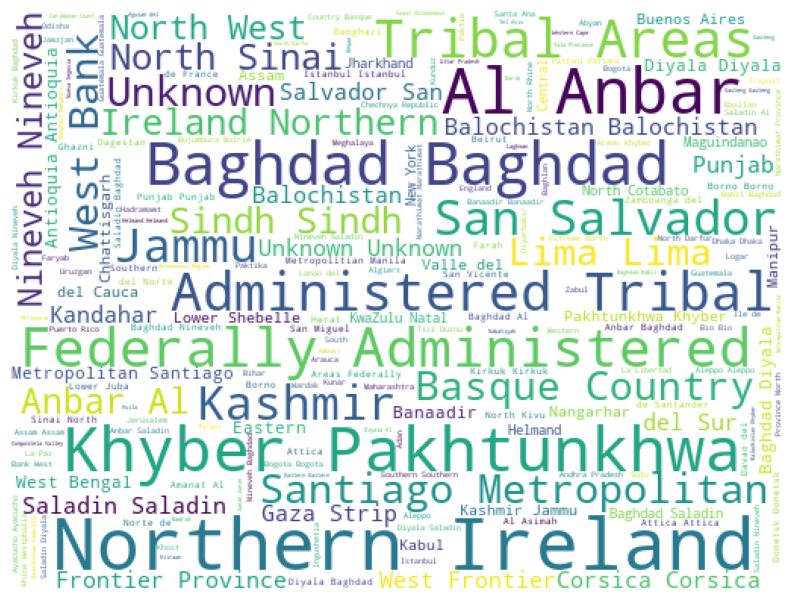

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cities = terror['state'].dropna()
plt.subplots(figsize=(10, 10))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


## Number of attacks

In [50]:
terror['year'].value_counts(dropna=False).sort_index()

year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

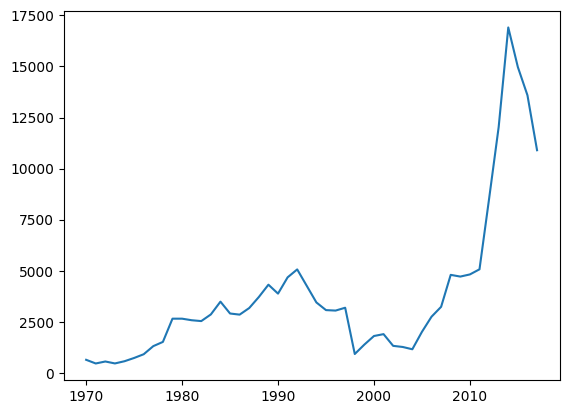

In [15]:
x_year=terror['year'].unique()
y_counts_years=terror['year'].value_counts(dropna=False).sort_index()
plt.plot(y_counts_years)
plt.show()

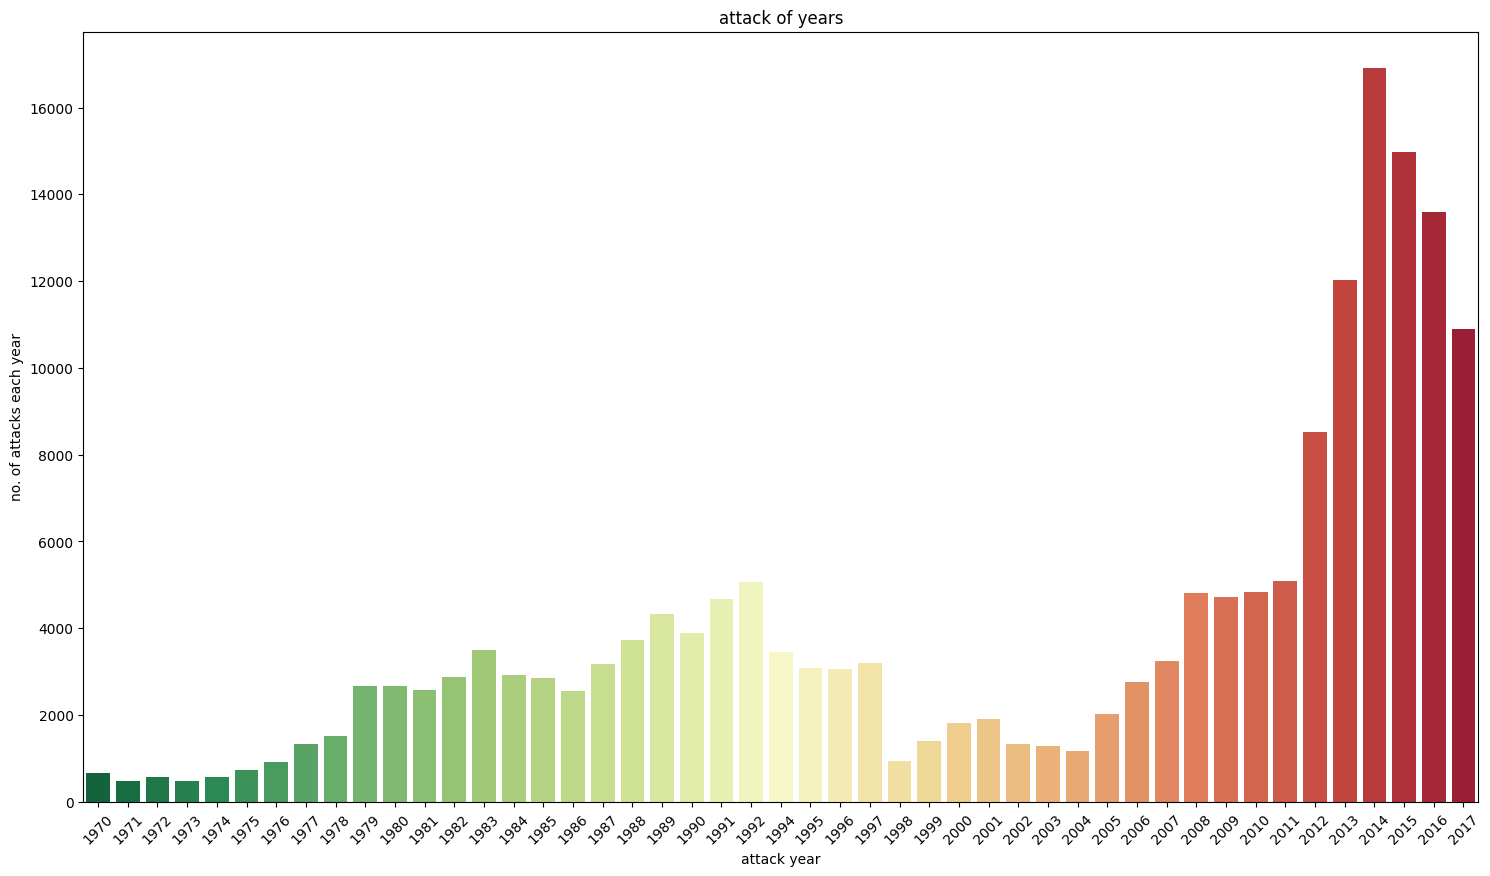

In [16]:
plt.figure(figsize=(18,10))
sns.barplot(x=x_year,y=y_counts_years,palette='RdYlGn_r')
plt.xticks(rotation=45)
plt.xlabel('attack year')
plt.ylabel('no. of attacks each year')
plt.title('attack of years')
plt.show()

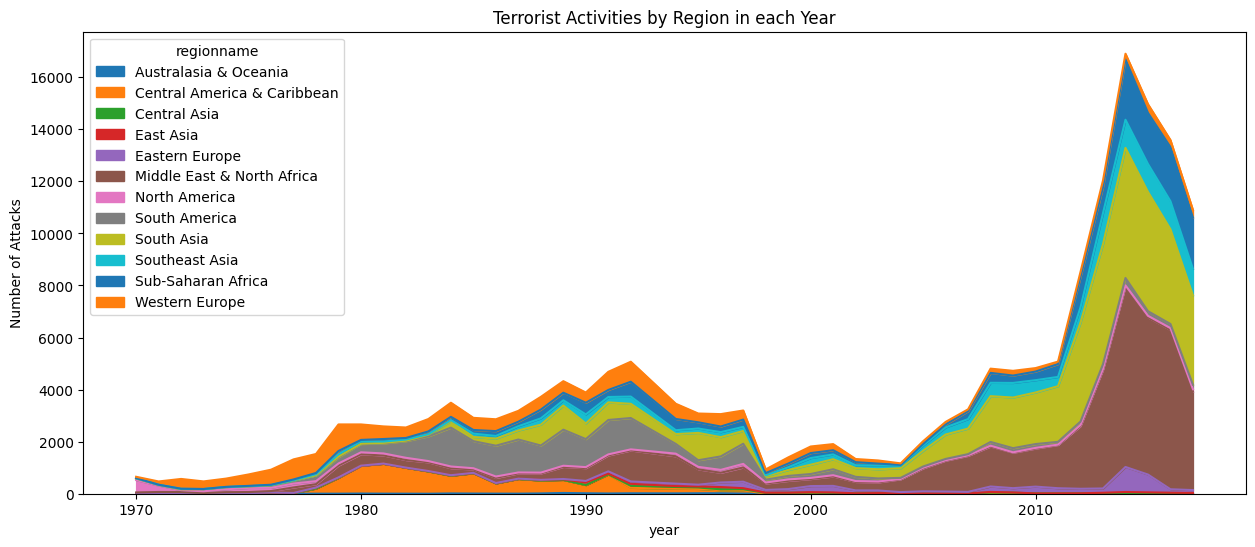

In [17]:
pd.crosstab(terror.year, terror.regionname).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

## Worst terror attack

In [18]:
terror['wounded']=terror['wounded'].fillna(0).astype(int)
terror['killed']=terror['killed'].fillna(0).astype(int)

In [19]:
terror['casualities']=terror['killed']+terror['wounded']

In [20]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]
heat=terror1.pivot_table(index='countryname',columns='year',values='casualities')
heat.fillna(0,inplace=True)

In [21]:
heat.head()

year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
countryname,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

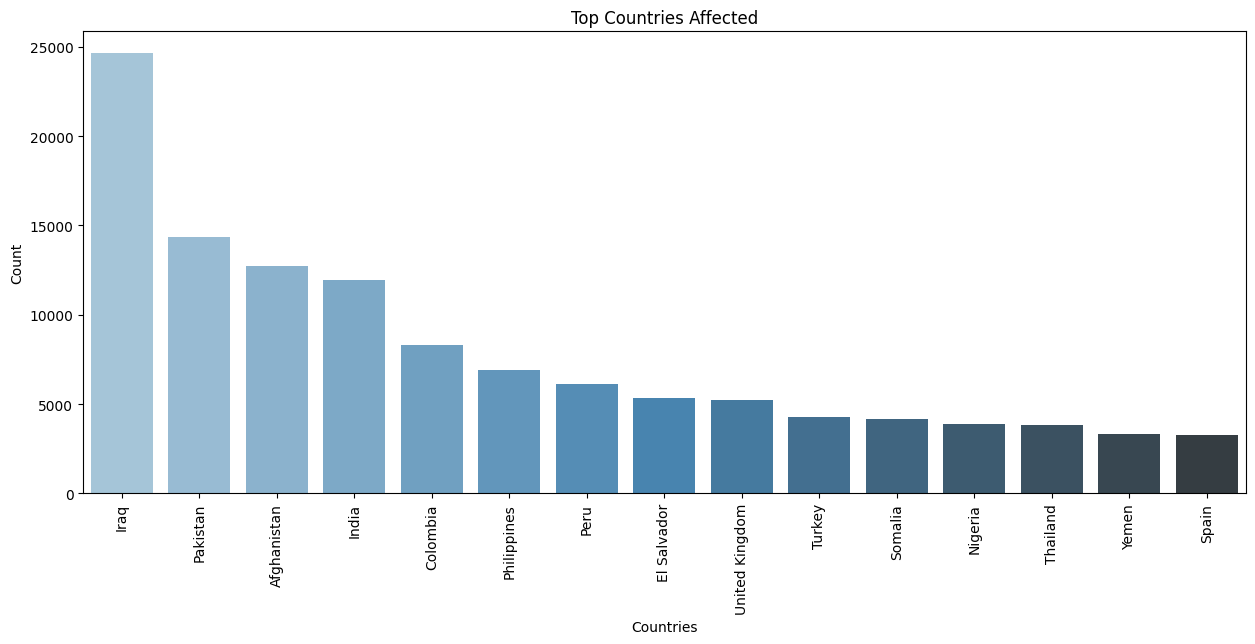

In [24]:
country_counts = terror['countryname'].value_counts()[:15]
plt.figure(figsize=(15, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Mapping Data

In [27]:
import folium
from folium.plugins import MarkerCluster 
filteryear = terror['year'] == 1970

In [28]:
filterdata=terror[filteryear]
reqfilterdata=filterdata.loc[:,'city':'longitude']
reqfilterdata=reqfilterdata.dropna()
reqfilterdatalist=reqfilterdata.values.tolist()


In [35]:
from folium import plugins
mymap = folium.Map(location=[0, 30], tiles='CartoDB Positron', zoom_start=2)

# Create a MarkerCluster
marker_cluster = plugins.MarkerCluster().add_to(mymap)

# Assuming reqfilterdatalist is a list of lists containing [popup_text, latitude, longitude]
for point in reqfilterdatalist:
    folium.Marker(location=[point[1], point[2]], popup=point[0]).add_to(marker_cluster)

mymap

In [37]:
terror.group.value_counts()[1:15]

group
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: count, dtype: int64

In [39]:
killdata = terror.loc[:,'killed']
print('Number of people killed by terror attack:', int(sum(killdata.dropna())))
attackdata = terror.loc[:,'attacktype']
typekilldata = pd.concat([attackdata, killdata], axis=1)

Number of people killed by terror attack: 411868


In [59]:
typekillformatdata=typekilldata.pivot_table(columns='attacktype',values='killed',aggfunc='sum')
typekillformatdata



attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [65]:
countrydata = terror.loc[:,'countryname']
countrykilldata = pd.concat([countrydata, killdata], axis=1)
countrykillformatdata = countrykilldata.pivot_table(columns='countryname', values='killed', aggfunc='sum')
countrykillformatdata

countryname,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


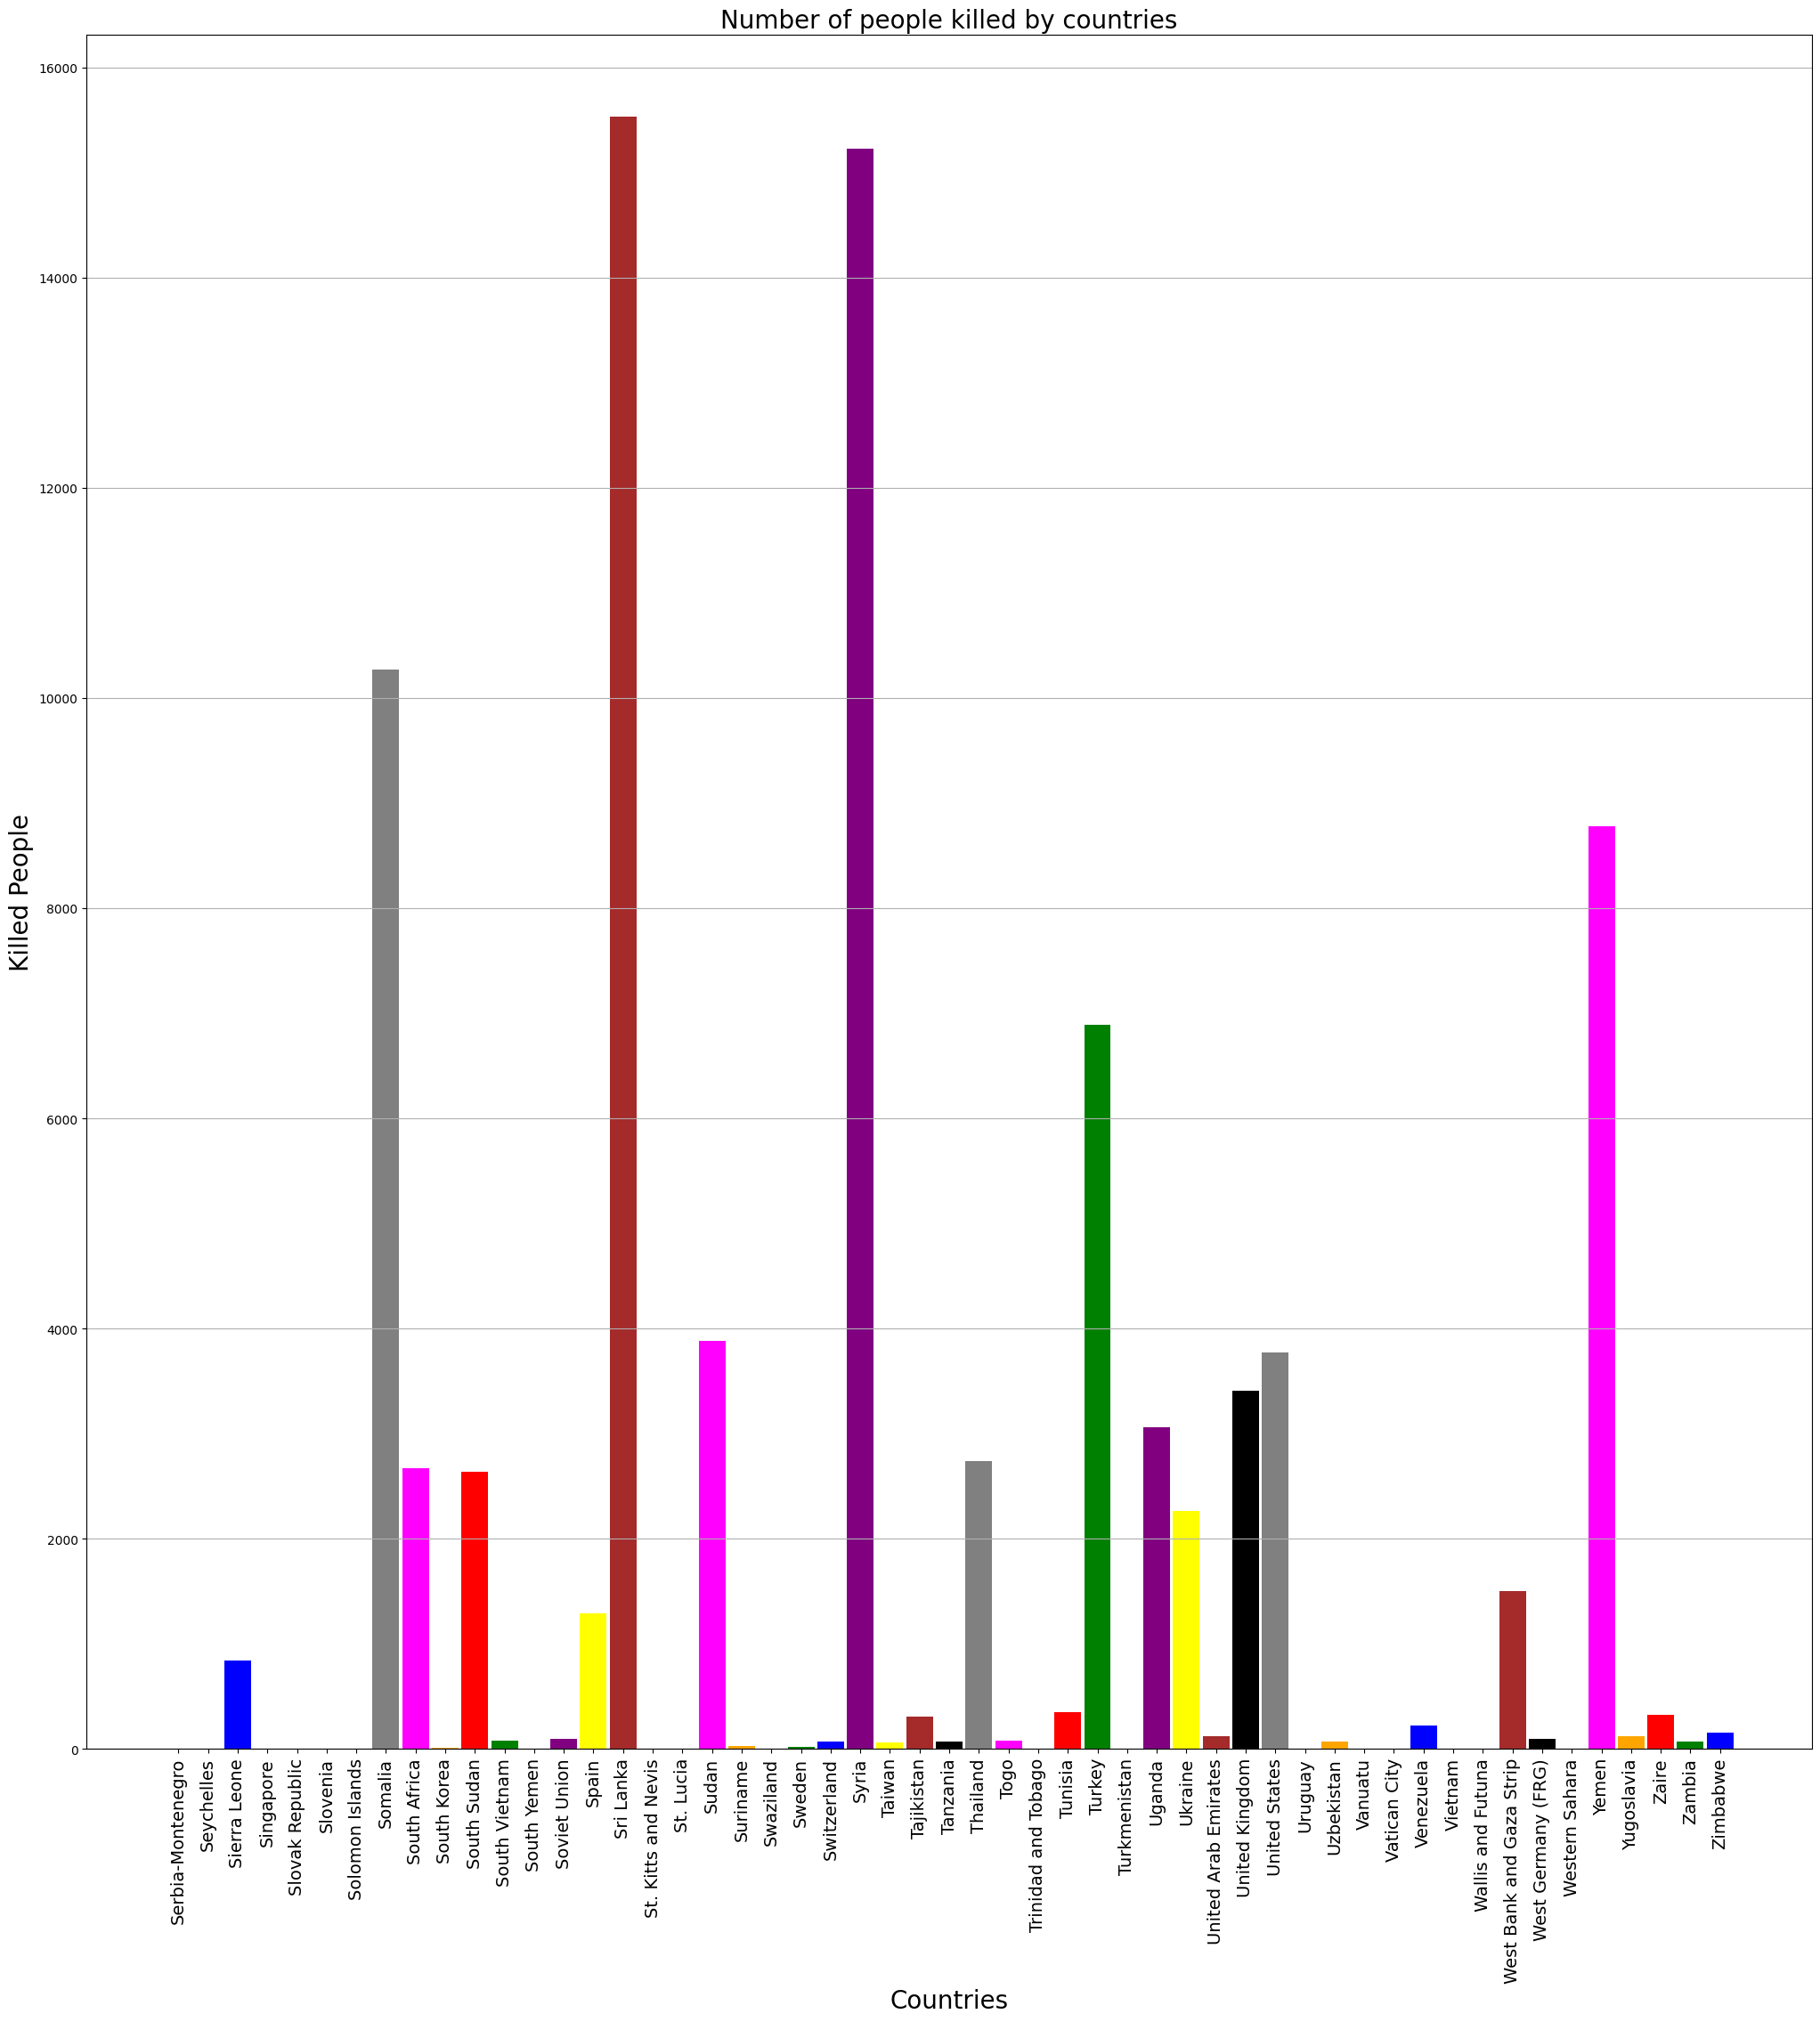

In [70]:
labels = countrykillformatdata.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countrykillformatdata.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=14, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()


## Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.